## 0. Imports

In [82]:
import cv2
import os
from utils.common import *
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
change_to_root_dir()

## 1. Check the size of the images

In [17]:
dataset_folder = 'artifacts/data/car-connection-by-brand/'

folders = os.listdir(dataset_folder)

images = []
images_shapes = []

for folder in folders:
    folder_path = os.path.join(dataset_folder, folder)
    for file in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(dataset_folder, folder, file)
        image = cv2.imread(file_path)

        # Convert to RGB as OpenCV uses BGR
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)

        # Obtain shape of each image and store them in an array
        (width, height) = image.shape[1], image.shape[0]
        images_shapes.append((width, height))

# Return only unique shapes
unique_shapes = list(set(images_shapes))

100%|██████████| 1231/1231 [00:13<00:00, 93.16it/s] 


In [19]:
print(unique_shapes)

[(320, 120), (320, 239), (320, 413), (320, 184), (320, 477), (320, 129), (320, 248), (320, 367), (320, 193), (320, 312), (320, 486), (320, 257), (320, 321), (320, 385), (320, 504), (320, 449), (320, 150), (320, 696), (320, 214), (320, 159), (320, 278), (320, 104), (320, 223), (320, 168), (320, 287), (320, 406), (320, 232), (320, 113), (320, 177), (320, 296), (320, 122), (320, 241), (320, 360), (320, 186), (320, 479), (320, 250), (320, 369), (320, 488), (320, 433), (320, 378), (320, 442), (320, 561), (320, 79), (320, 143), (320, 207), (320, 152), (320, 271), (320, 216), (320, 161), (320, 106), (320, 225), (320, 344), (320, 170), (320, 289), (320, 115), (320, 234), (320, 353), (320, 179), (320, 298), (320, 417), (320, 243), (320, 362), (320, 481), (320, 307), (320, 426), (320, 554), (320, 499), (320, 136), (320, 200), (320, 145), (320, 209), (320, 154), (320, 273), (320, 218), (320, 337), (320, 163), (320, 282), (320, 227), (320, 172), (320, 291), (320, 410), (320, 236), (320, 474), (320

## 2. Check the blurriness of the images

In [46]:
# Choosing 10 random images to see the mean of its variance of laplacian
variances_of_laplacian = []

for image in tqdm(images):
    variance_of_laplacian = cv2.Laplacian(image, cv2.CV_64F).var()
    variances_of_laplacian.append(variance_of_laplacian)

100%|██████████| 64467/64467 [05:24<00:00, 198.74it/s]

Variances of laplacian mean: 1526.2606099607642


In [47]:
print(f'Mean variance of laplacian: {np.mean(variances_of_laplacian)}')
print(f'Mininum variance of laplacian: {np.min(variances_of_laplacian)}')
print(f'Maximum variance of laplacian: {np.max(variances_of_laplacian)}')

Mean variance of laplacian: 1526.2606099607642
Mininum variance of laplacian: 41.30301522938293
Maximum variance of laplacian: 18871.209990716558


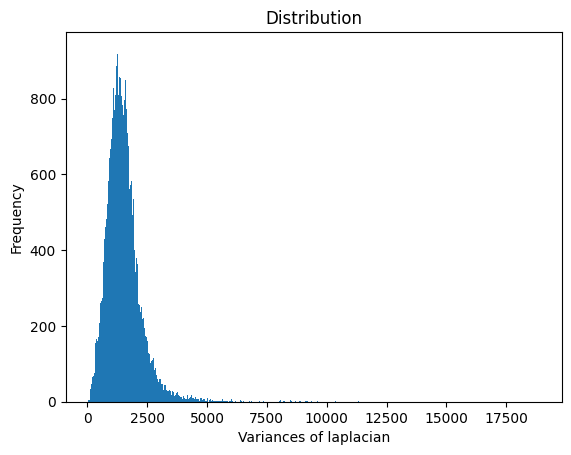

In [78]:
# Variances of Laplacian distribution
plt.hist(variances_of_laplacian, bins=1000)
plt.xlabel('Variances of laplacian')
plt.ylabel('Frequency')
plt.title('Distribution')
plt.show()

Exploring images with more/less Laplace variances

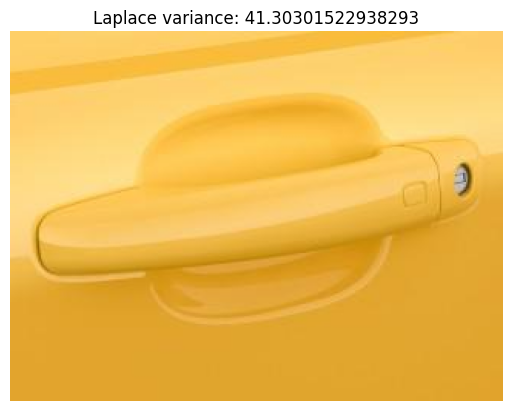

In [49]:
# Image with minimum variance index
min_variance_index = variances_of_laplacian.index(41.30301522938293)
show_image(images[min_variance_index], f'Laplace variance: {variances_of_laplacian[min_variance_index]}')

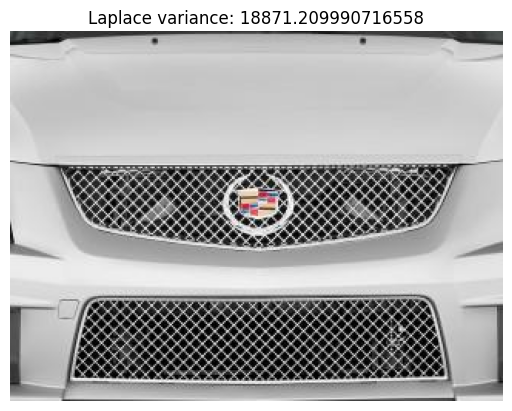

In [50]:
# Image with maximum variance index
max_variance_index = variances_of_laplacian.index(18871.209990716558)
show_image(images[max_variance_index], f'Laplace variance: {variances_of_laplacian[max_variance_index]}')

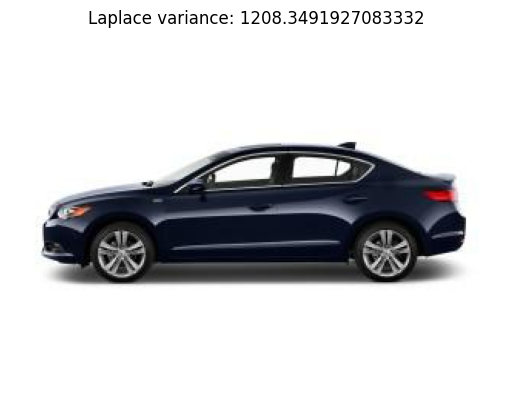

In [67]:
# Random image
index = 8
show_image(images[index], f'Laplace variance: {variances_of_laplacian[index]}')

Print 3 images on each variance of laplance range

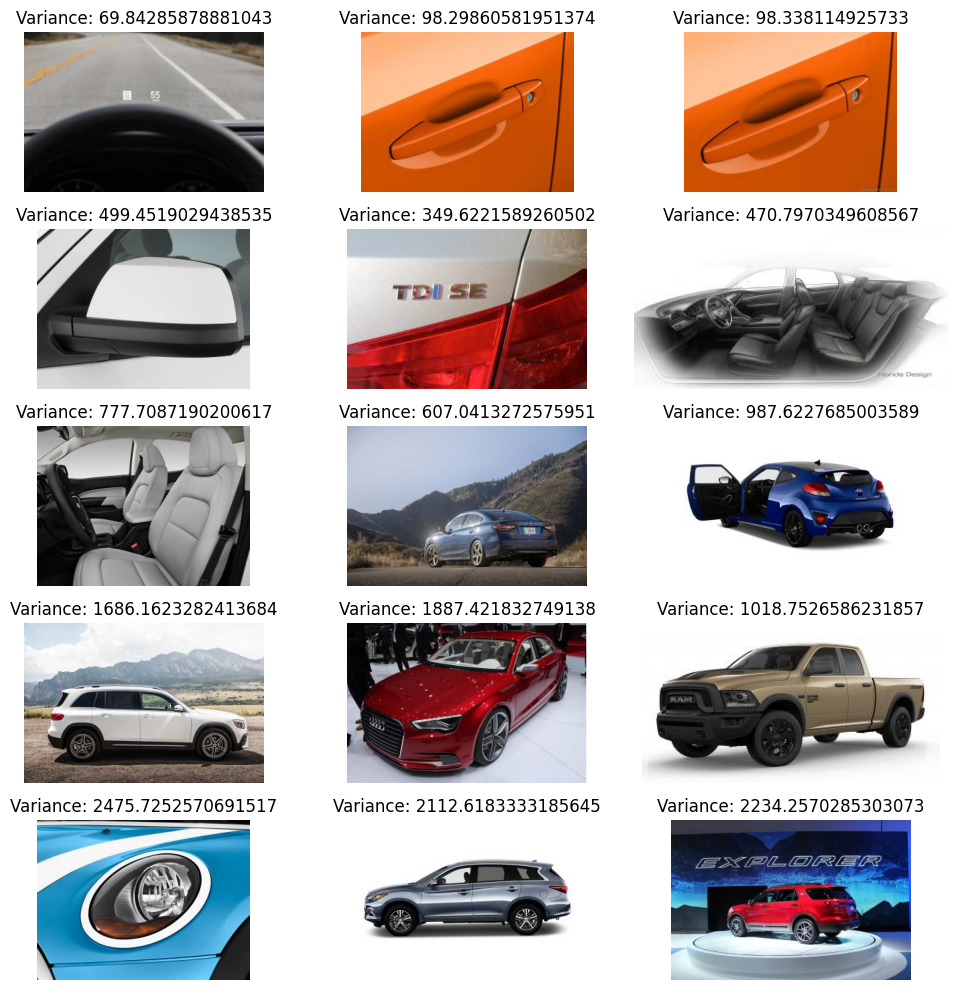

In [96]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))

ranges = [(0, 100), (100, 500), (500, 1000), (1000, 2000), (2000, 5000)]

for row, range in enumerate(ranges):
    images_in_range = [(image, variance) for image, variance in zip(images, variances_of_laplacian) if variance>range[0] and variance <=range[1]]
    rand_images_in_range = random.sample(images_in_range, min(3, len(images_in_range)))
    
    for col, image in enumerate(rand_images_in_range):
        axes[row, col].imshow(image[0])
        axes[row, col].set_title(f"Variance: {image[1]}")
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## 3. Check the color distribution

In [ ]:
# CODE HERE

## 4. Check class imbalance

In [ ]:
# CODE HERE

## 5. Check for duplicates images

In [ ]:
# CODE